## Super resolution test

In [1]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *

from torchvision.models import vgg16_bn

In [2]:
arch = models.resnet34

In [61]:
size=(200,150)

In [62]:
path = Path('./test_data')

In [63]:
data = (ImageImageList.from_folder(path/'PetsLR').split_by_rand_pct(.5, seed=42)
          .label_from_func(lambda x: path/'PetsGray'/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data.c = 3

In [64]:
learn = unet_learner(data, arch, loss_func=F.l1_loss, blur=True, norm_type=NormType.Weight)

In [65]:
learn.load('./gray2_4a');

In [66]:
learn.data = data

In [67]:
fn = data.train_ds.x.items[0]; fn

PosixPath('test_data/PetsLR/boxer_11.png')

In [68]:
img = open_image(fn); img.shape

torch.Size([3, 100, 75])

In [69]:
p,img_hr,b = learn.predict(img)

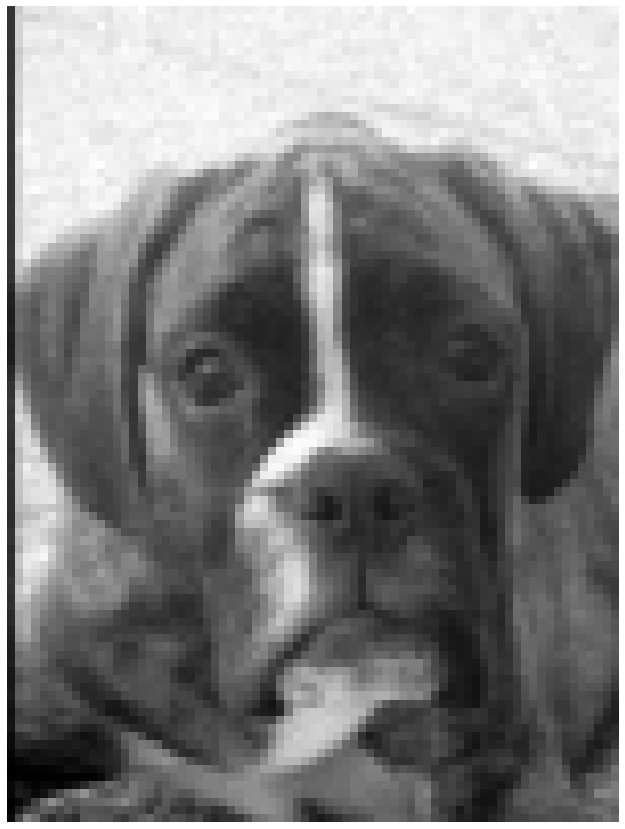

In [70]:
show_image(img, figsize=(15,15), interpolation='nearest');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


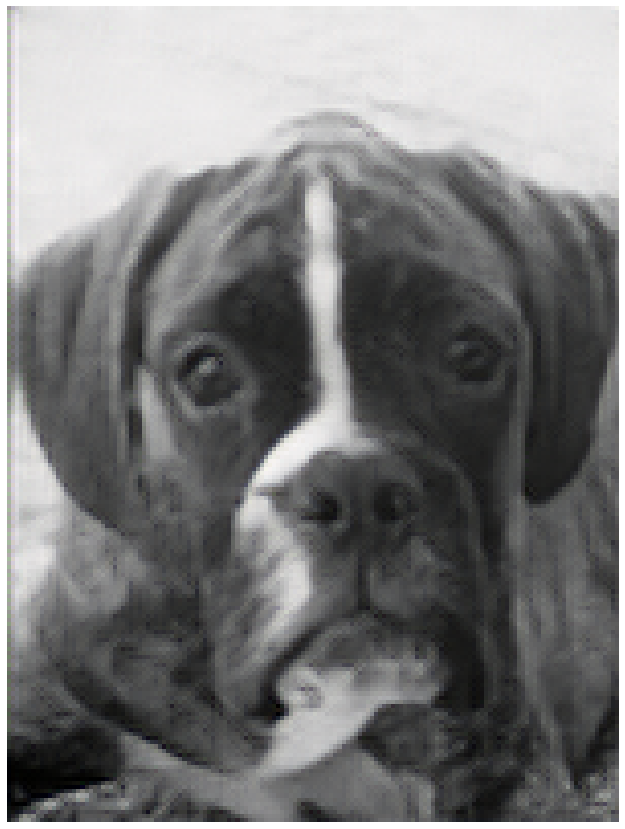

In [71]:
Image(img_hr).show(figsize=(15,15))

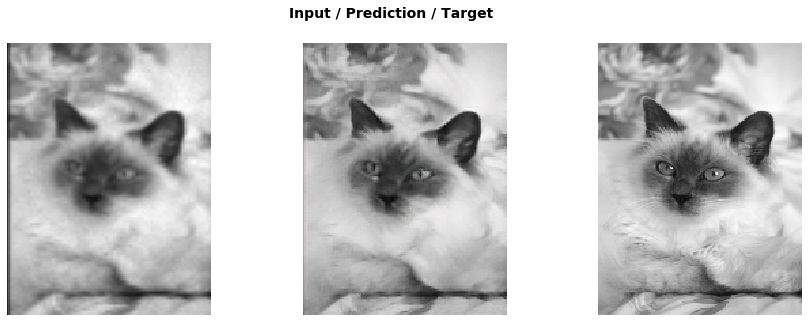

In [73]:
learn.show_results(imgsize=5, cmap='gray')

In [ ]:
Image(img_hr).save(savename)